In [1]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn import linear_model
#sqqq and tqqq are taken as IBdata feed not for SPXS 
path = '/home/octo/Dropbox/IQ_data/'
spy=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
sqqq= pd.read_csv(path + 'SQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
tqqq=pd.read_csv(path + 'TQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
spy=spy.tail(140000)
sqqq=sqqq.tail(140000)
tqqq=tqqq.tail(140000)

In [2]:
plt.rcParams['figure.figsize'] = 8,6

In [3]:
spy.head()

,high,low,open,close,total_volume,volume
2017-03-14 11:30:05,236.880,236.86,236.860,236.8800,24159450,9375
2017-03-14 11:30:10,236.880,236.88,236.880,236.8800,24160980,1452
2017-03-14 11:30:15,236.885,236.88,236.885,236.8800,24161907,927
2017-03-14 11:30:20,236.870,236.85,236.870,236.8501,24165485,3304
2017-03-14 11:30:25,236.860,236.84,236.851,236.8400,24173765,8273


In [4]:
#some descriptive statistics
spy.describe()

,high,low,open,close,total_volume,volume
count,140000.000000,140000.000000,140000.000000,140000.000000,1.400000e+05,1.400000e+05
mean,235.580173,235.564172,235.572235,235.572134,3.449115e+07,1.290780e+04
std,1.619199,1.621159,1.620219,1.620173,1.930760e+07,2.369254e+04
min,231.670000,231.610000,231.640000,231.640000,7.005180e+05,1.000000e+02
25%,234.330000,234.310000,234.320000,234.320000,1.969009e+07,1.946000e+03
50%,235.280000,235.270000,235.275000,235.275000,3.243036e+07,5.815000e+03
75%,236.800000,236.790000,236.790000,236.790000,4.714428e+07,1.456000e+04
max,239.530000,239.520000,239.530000,239.529900,1.191177e+08,1.014089e+06


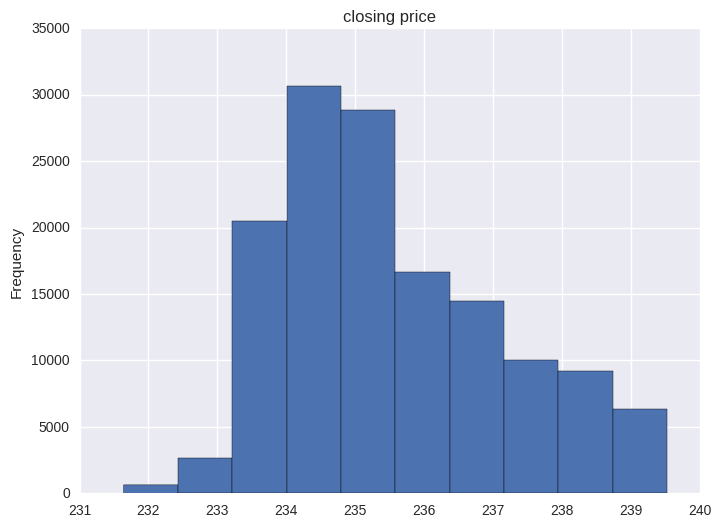

In [5]:
spy['close'].plot(kind='hist', grid=True, title='closing price')

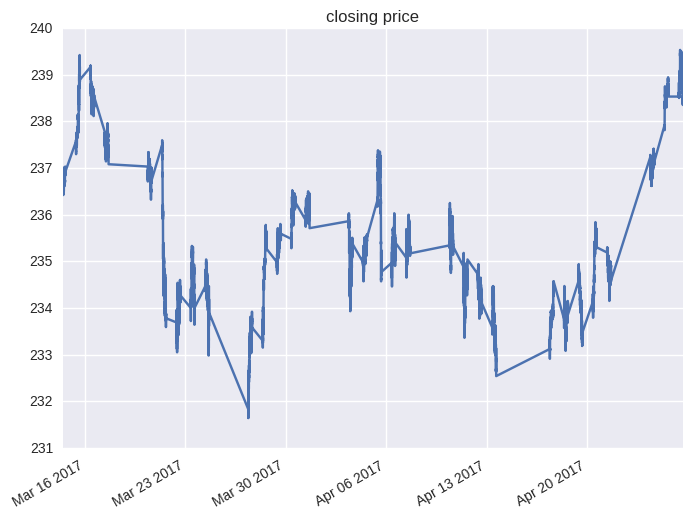

In [6]:
spy['close'].plot(kind='line', grid=True, title='closing price')

In [7]:
# data series
spy_ds = spy.ix[139000:, 'close']

print ('spy is a', type(spy))
print ( 'spy_ds', type(spy_ds))

spy is a <class 'pandas.core.frame.DataFrame'>
spy_ds <class 'pandas.core.series.Series'>


In [8]:
spy_ds.describe()

count    1000.000000
mean      238.972627
std         0.253597
min       238.350000
25%       238.760000
50%       239.090000
75%       239.160000
max       239.280000
Name: close, dtype: float64

In [9]:
spy_ds.head()

2017-04-26 14:34:50    239.195
2017-04-26 14:34:55    239.180
2017-04-26 14:35:00    239.160
2017-04-26 14:35:05    239.170
2017-04-26 14:35:10    239.170
Name: close, dtype: float64

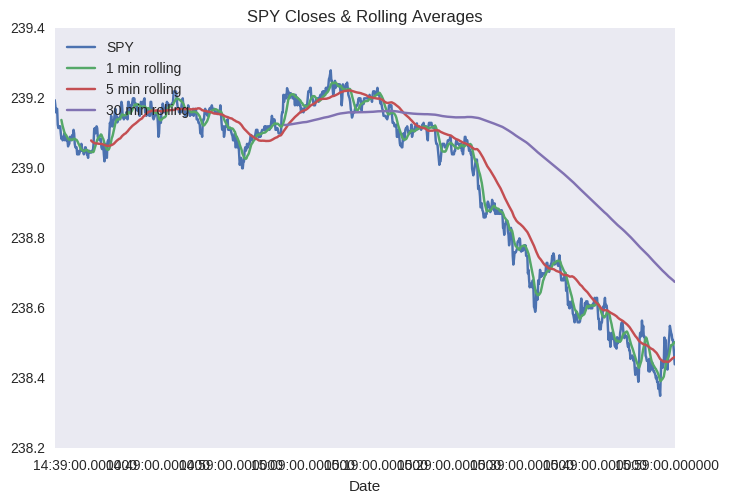

In [10]:
# Find 7, 30, 120 day moving averages (very broadly, rolling week, month and quarter)
spy_12 = spy_ds .rolling(window=12).mean()
spy_60 = spy_ds .rolling(window=60).mean()
spy_360 = spy_ds.rolling(window=360).mean()

fig = plt.figure()
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
ax.plot(spy_ds.index, spy_ds, label='SPY')
ax.plot(spy_12.index, spy_12, label='1 min rolling')
ax.plot(spy_60.index, spy_60, label='5 min rolling')
ax.plot(spy_360.index,spy_360, label='30 min rolling')
ax.grid()
ax.legend(loc=2)
ax.set_xlabel('Date')
plt.title('SPY Closes & Rolling Averages')
plt.show()

In [11]:
#frequency
round(spy['close']).value_counts()

235.0    37702
234.0    33365
236.0    21701
237.0    18022
239.0    11250
238.0     9457
233.0     7761
232.0      728
240.0       14
Name: close, dtype: int64

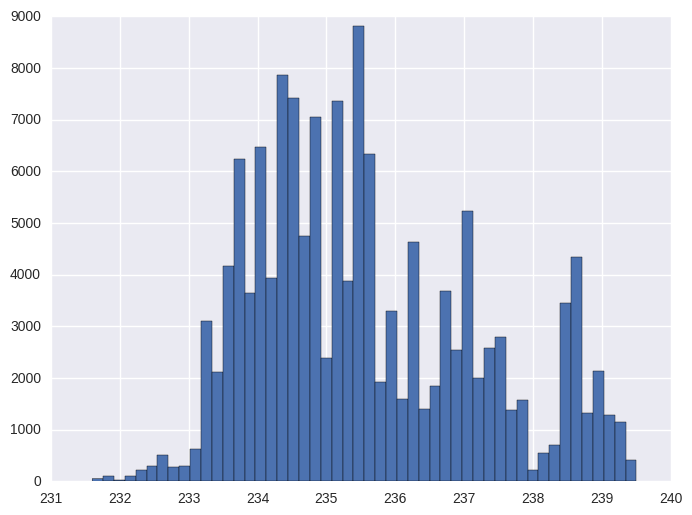

In [12]:
round(spy['close'],1).hist(bins=50)

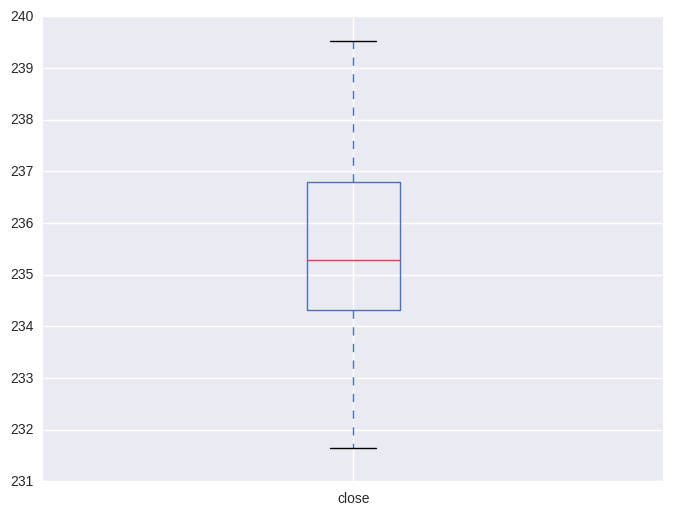

In [13]:
spy.boxplot(column='close')

In [19]:
#df for datascience
df=pd.DataFrame(data=spy.open)
#df['time']=df.index.strftime('%H:%M:%S')
time=df.index.strftime('%H:%M:%S')

In [20]:
P=(spy.high+spy.low+spy.close)/3
vwap=pd.rolling_sum(spy.volume*P,12)/pd.rolling_sum(spy.volume,12)
df['spread']=pd.rolling_sum(pd.DataFrame(data=(spy.open-vwap)),60)

Signal

In [21]:
P=(spy.high+spy.low+spy.close)/3
vwap=pd.rolling_sum(spy.volume*P,12)/pd.rolling_sum(spy.volume,12)
df['spread']=pd.rolling_sum(pd.DataFrame(data=(spy.open-vwap)),60)

In [43]:
df['UT']=(pd.rolling_max(spy.high,60)+pd.rolling_max(P+spy.high-spy.low,60))*0.5-0.02
df['DT']=(pd.rolling_min(spy.low,60)+pd.rolling_min(P+spy.high-spy.low,60))*0.5+0.02
df['BS']=np.where(df.open<=df.DT,"B",np.where(df.open>=df.UT,"S","H"))

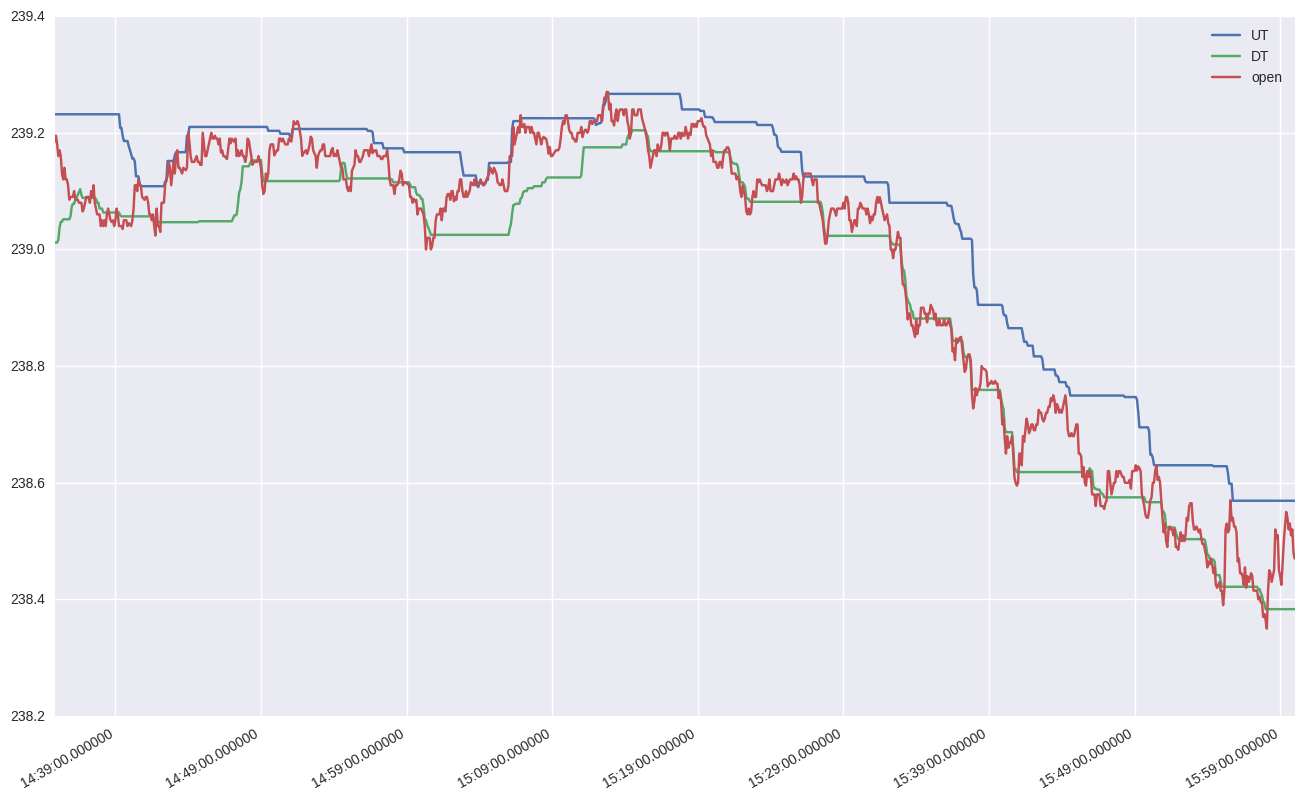

In [44]:
df[['UT','DT','open']].tail(1000).plot(figsize=(16, 10))
plt.show()

In [45]:
df.tail()

,open,spread,UT,DT,BS
2017-04-26 15:59:40,238.53,0.515329,238.569167,238.383333,H
2017-04-26 15:59:45,238.51,0.562592,238.569167,238.383333,H
2017-04-26 15:59:50,238.52,0.608159,238.569167,238.383333,H
2017-04-26 15:59:55,238.48,0.620912,238.569167,238.383333,H
2017-04-26 16:00:00,238.47,0.621826,238.569167,238.383333,H


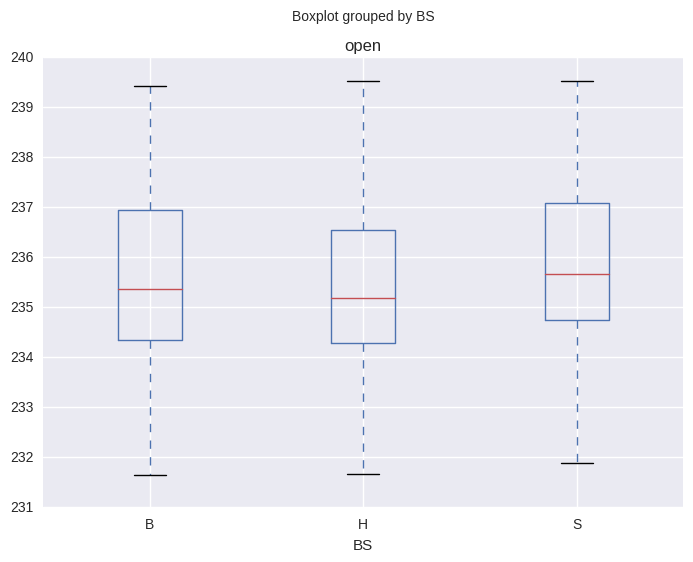

In [46]:
df.boxplot(column='open',by ='BS')

In [51]:
temp1 = round(df['spread']).value_counts(ascending=True)
temp2 = df.pivot_table(values='spread',index=['BS'],aggfunc=lambda x: x.map({'B':1,'S':-1,'H':0}).mean())

In [52]:
print ('Frequency Table for spread:')
print (temp1)
print ('\nProbility') 
print (temp2.tail())

Frequency Table for spread:
 11.0         1
-9.0          1
 10.0         1
-10.0         1
 8.0          1
-14.0         1
-13.0         1
-8.0          1
-11.0         1
 12.0         2
-12.0         2
 9.0          2
 7.0          5
 13.0         6
-18.0         7
-17.0         8
-15.0         9
-19.0         9
-16.0        20
-7.0         27
 14.0        46
-4.0         53
-6.0         68
-5.0         68
 5.0        127
 6.0        131
 3.0        136
 4.0        151
-3.0        267
 2.0        612
-2.0        973
-1.0      13383
 1.0      13931
 0.0     109878
Name: spread, dtype: int64

Probility
BS
B   NaN
H   NaN
S   NaN
Name: spread, dtype: float64


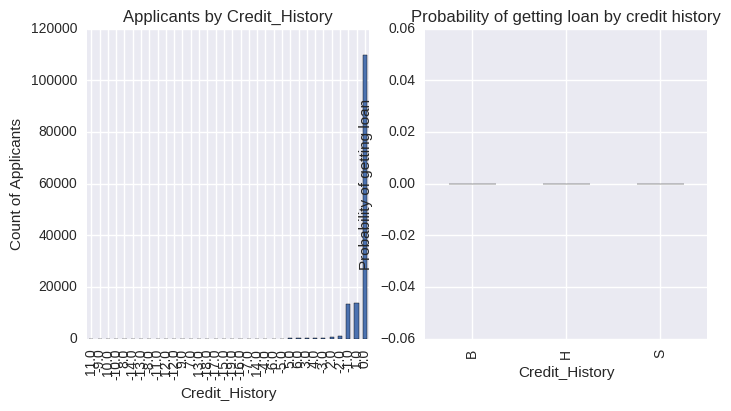

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

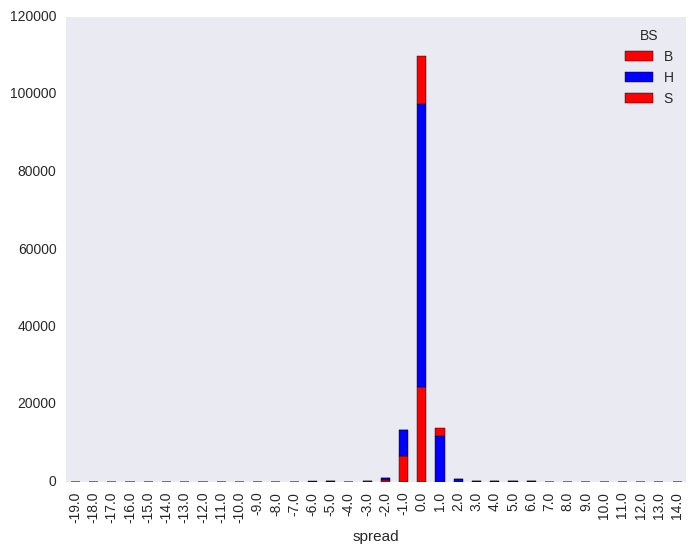

In [55]:
temp3 = pd.crosstab(round(df['spread']), df['BS'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [62]:
 # number of missing values in each column as isnull() returns 1, if the value is null.
df.apply(lambda x: sum(x.isnull()),axis=0) 

open      0
spread    0
UT        0
DT        0
BS        0
dtype: int64

In [61]:
# filling missing value using mean
df['spread'].fillna(df['spread'].mean(), inplace=True)
df['UT'].fillna(df['UT'].mean(), inplace=True)
df['DT'].fillna(df['DT'].mean(), inplace=True)

In [63]:
df['BS'].value_counts()

H    93907
B    31523
S    14570
Name: BS, dtype: int64

In [67]:
#table = df.pivot_table(values='UT', index='spread' ,columns='open', aggfunc=np.median)

In [69]:
#Boolean indexing
df.loc[(df["spread"]<0) & (df["BS"]=="B") & (df["DT"]>df["open"]), ['open',"spread","BS","DT"]]

,open,spread,BS,DT
2017-03-14 11:39:40,236.8100,-0.016574,B,236.825000
2017-03-14 11:39:50,236.8100,-0.072238,B,236.825000
2017-03-14 11:39:55,236.8100,-0.100791,B,236.825000
2017-03-14 11:45:15,236.8200,-0.024496,B,236.830000
2017-03-14 11:45:20,236.8200,-0.054613,B,236.830000
2017-03-14 11:45:25,236.8100,-0.074317,B,236.822500
2017-03-14 11:45:30,236.7900,-0.113408,B,236.808533
2017-03-14 11:45:35,236.7900,-0.160782,B,236.808533
2017-03-14 11:45:40,236.7900,-0.213233,B,236.808533
2017-03-14 11:45:50,236.8000,-0.266226,B,236.808533


In [70]:
#Boolean indexing
df.loc[(df["spread"]>0) & (df["BS"]=="S") & (df["UT"]<df["open"]), ['open',"spread","BS","DT"]]

,open,spread,BS,DT
2017-03-14 11:38:20,236.9000,0.004963,S,236.795000
2017-03-14 11:38:25,236.9000,0.046868,S,236.795000
2017-03-14 11:40:40,236.8950,0.019261,S,236.825000
2017-03-14 11:41:05,236.9100,0.041121,S,236.825000
2017-03-14 11:41:10,236.9100,0.030093,S,236.825000
2017-03-14 11:41:15,236.9000,0.014922,S,236.825000
2017-03-14 11:42:00,236.9299,0.019271,S,236.825000
2017-03-14 11:42:05,236.9380,0.052786,S,236.825000
2017-03-14 11:49:55,236.9100,0.051847,S,236.787400
2017-03-14 11:50:00,236.9000,0.086414,S,236.787400


In [72]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
open      0
spread    0
UT        0
DT        0
BS        0
dtype: int64

Missing values per row:
2017-03-14 11:30:05    0
2017-03-14 11:30:10    0
2017-03-14 11:30:15    0
2017-03-14 11:30:20    0
2017-03-14 11:30:25    0
dtype: int64


http://blog.nycdatascience.com/student-works/capstone/event-driven-stock-prediction/

https://github.com/edenbaus/Event-Driven-FinModel

http://nb.bianp.net/sort/views/

http://blog.yhat.com/posts/data-science-in-python-tutorial.html

https://medium.com/towards-data-science/how-i-predicted-the-stock-market-at-numerai-ml-tournament-6f74e1c8809e

https://github.com/yhat/DataGotham2013/blob/master/notebooks/1%20-%20Tools%20Overview.ipynb

In [73]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression

In [76]:
stocks =spy

In [81]:
stocks.index

DatetimeIndex(['2017-03-14 11:30:05', '2017-03-14 11:30:10',
               '2017-03-14 11:30:15', '2017-03-14 11:30:20',
               '2017-03-14 11:30:25', '2017-03-14 11:30:30',
               '2017-03-14 11:30:35', '2017-03-14 11:30:40',
               '2017-03-14 11:30:50', '2017-03-14 11:30:55',
               ...
               '2017-04-26 15:59:15', '2017-04-26 15:59:20',
               '2017-04-26 15:59:25', '2017-04-26 15:59:30',
               '2017-04-26 15:59:35', '2017-04-26 15:59:40',
               '2017-04-26 15:59:45', '2017-04-26 15:59:50',
               '2017-04-26 15:59:55', '2017-04-26 16:00:00'],
              dtype='datetime64[ns]', length=140000, freq=None)

In [83]:
stocks =spy
stocks["Date"] = pd.to_datetime(stocks.index)
stocks.sort(columns = "Date",axis = 0, ascending = True, inplace = True)

In [97]:
# Finding the close values.
close_values = []
for stock in stocks.iterrows():
    close_values.append(stock[1]["close"])

In [99]:
close_values[35]

236.84

In [103]:
def aggregate_timeseries(values_list, length, func):
    append_tolist = list(np.zeros((length,), dtype=np.int))
    j = None
    for i in range(len(values_list)):
        if i >= length:
            if i-length != 0:
                j = i-length
            append_tolist.append(func(values_list[i:j:-1]))
    return append_tolist

            
stocks["Close_5"] = aggregate_timeseries(close_values, 5, np.mean)
stocks["Close_30"] = aggregate_timeseries(close_values, 30, np.mean)
stocks["Std_5"] = aggregate_timeseries(close_values, 5, np.std)

In [104]:
stocks.tail()

,high,low,open,close,total_volume,volume,Date,Close_5,Close_30,Std_5
2017-04-26 15:59:40,238.54,238.49,238.53,238.51,68620510,110204,2017-04-26 15:59:40,238.531,238.448707,0.013565
2017-04-26 15:59:45,238.52,238.49,238.51,238.51,68705959,83545,2017-04-26 15:59:45,238.523,238.451873,0.011662
2017-04-26 15:59:50,238.52,238.48,238.52,238.49,68765239,58069,2017-04-26 15:59:50,238.513,238.454540,0.014000
2017-04-26 15:59:55,238.50,238.44,238.48,238.47,69037447,269205,2017-04-26 15:59:55,238.501,238.456873,0.019079
2017-04-26 16:00:00,238.48,238.43,238.47,238.44,69386101,346520,2017-04-26 16:00:00,238.484,238.458040,0.026533


In [107]:
stocks = stocks[stocks["Close_30"] != 0]
stocks = stocks.dropna(axis = 0)

train = stocks[stocks["Date"] < datetime(year=2017, month =4 , day =20)]
test = stocks[stocks["Date"] >= datetime(year=2017, month =4 , day =20)]

print("Shape of training data:",train.shape)
print("Shape of test data",test.shape)

Shape of training data: (117158, 10)
Shape of test data (22812, 10)


In [110]:
model = LinearRegression()
model.fit(train[["Close_5","Close_30","Std_5"]], train["close"])
predict_close = model.predict(test[["Close_5","Close_30","Std_5"]])
actual_close = test["close"]

mean_absolute_error = np.mean(abs(predict_close - actual_close))
print("The mean absolute error is ", mean_absolute_error)

The mean absolute error is  0.0110276455901


In [111]:
predict_close

array([ 233.57313136,  233.70076986,  233.8385381 , ...,  238.51641639,
        238.50187316,  238.48139614])

In [116]:
#https://www.quantopian.com/posts/quantopian-lecture-series-kalman-filters
#!pip install pykalman
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import poly1d

In [117]:
x=spy.close

In [119]:
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [120]:
# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index=x.index)

In [122]:
# Compute the rolling mean with various lookback windows
mean30 = pd.rolling_mean(x, 30)
mean60 = pd.rolling_mean(x, 60)
mean90 = pd.rolling_mean(x, 90)

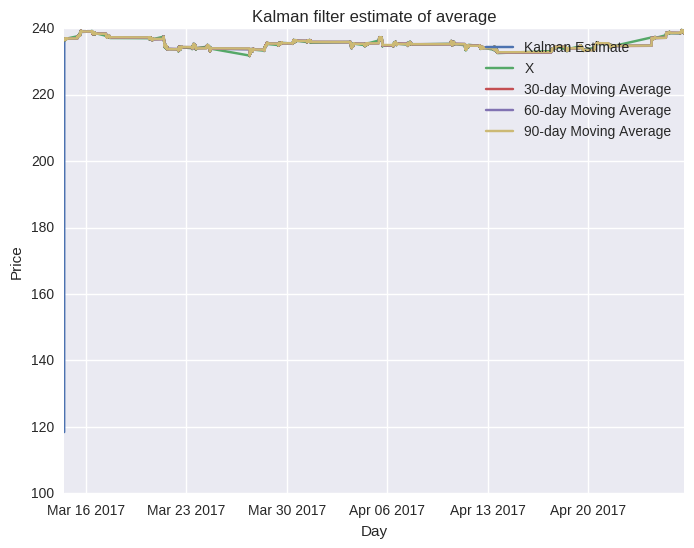

In [123]:
# Plot original data and estimated mean
plt.plot(state_means)
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman Estimate', 'X', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])
plt.xlabel('Day')
plt.ylabel('Price');

In [139]:
import pandas as pd
from pandas.io.data import DataReader
from pykalman import KalmanFilter

In [143]:
pd.set_option('display.mpl_style',  'default')
#mpl.rcParams['figure.figsize'] = 8, 6

https://github.com/quantopian/research_public/blob/master/workshops/StartupML_05_12_2016/Zipline_simple_example.ipynb

In [127]:
#!pip install zipline
import pytz
from datetime import datetime

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_bars_from_yahoo